In [1]:
''' Project 2: Different economic sectors and their association with economic growth
    Author: Kanchan Ghimire
    Date: November 27, 2018
    Purpose: Data Mining
    Data source: The World Bank (official website)
 '''

' Project 2: The change in economic structure and its possible impact on economic growth\n    Author: Kanchan Ghimire\n    Date: November 27, 2018\n    Purpose: Data Mining\n    Data source: The World Bank (official website)\n '

In [2]:
# Import pandas, matplotlib and plotly

import pandas as pd
import matplotlib.pyplot as plt
import plotly
import plotly.plotly as py

py.sign_in('kghimire92','nDX6o3NGJz4ffM0S6d56') # sign in to plotly account

In [3]:
# Assign spreadsheet names to new variables

agricultureSectorValues = 'agriculture_percent_of_gdp.xlsx'
industrySectorValues = 'industry_percent_of_gdp.xlsx'
serviceSectorValues = 'services_percent_of_gdp.xlsx'
gdpValues = 'gdp.xlsx'
popValues = 'population_total.xlsx'

In [4]:
# Load excel/ spreadsheet files into dataframes using pandas

agriculture = pd.read_excel(agricultureSectorValues)
industry = pd.read_excel(industrySectorValues)
service = pd.read_excel(serviceSectorValues)
gdp = pd.read_excel(gdpValues)
population = pd.read_excel(popValues)

In [5]:
# Index dataframes by country names

agriculture = agriculture.set_index(['country'])
industry = industry.set_index(['country'])
service = service.set_index(['country'])
gdp = gdp.set_index(['country'])
population = population.set_index(['country'])

In [6]:
# Selective columns (year 2000 to 2015) used into making new dataframes

agricultureDf = agriculture.iloc[:,40:40+16]
industryDf = industry.iloc[:,40:40+16]
serviceDf = service.iloc[:,40:40+16]
gdpDf = gdp.iloc[:,40:40+16]
popDf = population.iloc[:,200:200+16]

In [7]:
# Delete NaN values from each dataframes

agricultureDf = agricultureDf.dropna()
industryDf = industryDf.dropna()
serviceDf = serviceDf.dropna()
gdpDf = gdpDf.dropna()
popDf = popDf.dropna()

In [8]:
# Stack dataframes and set column headings

stackedAgri = pd.DataFrame(agricultureDf.stack(level=0),columns=['Agriculture (% of GDP)'])
stackedIndus = pd.DataFrame(industryDf.stack(level=0),columns=['Industry (% of GDP)'])
stackedServ = pd.DataFrame(serviceDf.stack(level=0),columns=['Service (% of GDP)'])
stackedGDP = pd.DataFrame(gdpDf.stack(level=0),columns=['GDP (in USD)'])
stackedPop = pd.DataFrame(popDf.stack(level=0),columns=['Population'])

In [9]:
# Join dataframes into one dataframe 

joinedDf = stackedPop.join(stackedGDP).join(stackedAgri).join(stackedIndus).join(stackedServ)

In [10]:
# Drop NaN/ missing values from the dataframe

joinedDf = joinedDf.dropna()
joinedDf.shape # size of the dataframe (rows and columns)

(2384, 5)

In [11]:
# Create a column "Other" which gives the percentage of GDP by other sectors combined
# Create a column "GDP Per Capita" (GDP adjusted for population difference between countries)
# Create columns to calculate the actual USD values contributed to the GDP by each sectors (agriculture, industry, service, other)

joinedDf['Other (% of GDP)'] = 100 - (joinedDf['Agriculture (% of GDP)'] + joinedDf['Industry (% of GDP)'] + joinedDf['Service (% of GDP)'])

joinedDf['GDP Per Capita (in USD)'] = joinedDf['GDP (in USD)'] / joinedDf['Population']

joinedDf['Value by Agriculture (in USD)'] = (joinedDf['Agriculture (% of GDP)']/100.00) * joinedDf['GDP (in USD)']
joinedDf['Value by Industry (in USD)'] = (joinedDf['Industry (% of GDP)']/100.00) * joinedDf['GDP (in USD)']
joinedDf['Value by Service (in USD)'] = (joinedDf['Service (% of GDP)']/100.00) * joinedDf['GDP (in USD)']
joinedDf['Value by Other (in USD)'] = (joinedDf['Other (% of GDP)']/100.00) * joinedDf['GDP (in USD)']

In [12]:
# List of countries used in the project (after removing missing values)

indexList = joinedDf.index.tolist() # gives the list of country names

listOfCountries = list()

# skip 16 because same country will have 16 years before another country shows up
for i in range(0,2384,16):
    listOfCountries.append(indexList[i][0])

In [13]:
# Number of countries used for the project

len(listOfCountries)

149

In [14]:
# Function that takes two arguments (year and list of countries), and calculates number of countries heavily reliant on 
# a sector for over 50 percent of the country's GDP. The function then returns a dictionary that maps certain 
# sector dependence with the number of countries dependent on that sector

def sectorIntensiveCountries (year,countriesList=listOfCountries):

    agriCounter = 0
    indusCounter = 0
    servCounter = 0
    otherCounter = 0

    for country in countriesList:
        
        if joinedDf.loc[country].loc[year].loc['Agriculture (% of GDP)'] > 50:
            agriCounter += 1
        elif joinedDf.loc[country].loc[year].loc['Industry (% of GDP)'] > 50:
            indusCounter += 1
        elif joinedDf.loc[country].loc[year].loc['Service (% of GDP)'] > 50:
            servCounter += 1
        elif joinedDf.loc[country].loc[year].loc['Other (% of GDP)'] > 50:
            otherCounter += 1
            
        
    return dict({'Agriculture-dependent countries':agriCounter,'Industry-dependent countries':indusCounter,
                    'Service-dependent countries':servCounter,'Other-dependent countries':otherCounter})

In [15]:
# To see a pattern/ change in sector reliance (for over 50% of GDP) over time 

for i in range(2000,2016,5):
    print('Year',i,' -')
    dict1 = sectorIntensiveCountries(i)
    for key, value in dict1.items():
        print(key,': ',value)
    print()

Year 2000  -
Agriculture-dependent countries :  2
Industry-dependent countries :  4
Service-dependent countries :  88
Other-dependent countries :  0

Year 2005  -
Agriculture-dependent countries :  3
Industry-dependent countries :  8
Service-dependent countries :  86
Other-dependent countries :  0

Year 2010  -
Agriculture-dependent countries :  3
Industry-dependent countries :  7
Service-dependent countries :  95
Other-dependent countries :  0

Year 2015  -
Agriculture-dependent countries :  2
Industry-dependent countries :  6
Service-dependent countries :  104
Other-dependent countries :  0



In [16]:
# Function that identifies the top 10 countries in a giver sector in a given year, and plots a graph to see how their
# sector dependence has changed over time
# Also allows to see if the top 10 countries remain the same over time by graphing multiple years' top 10 countries

def top10CountriesTimeSeries(sectorName,year):
    
    sectorDf = joinedDf[sectorName + ' (% of GDP)'].unstack().sort_values(by=[year],ascending=False)
    sectorDf = sectorDf.head(10).transpose()
    sectorDf.plot(figsize=(12,9))
    plt.xlabel('Year (2000-2015)')
    plt.ylabel(sectorName + '(% of GDP)')
    plt.title('Top 10 Countries in '+ sectorName + ' for ' + str(year))
    plt.show() 

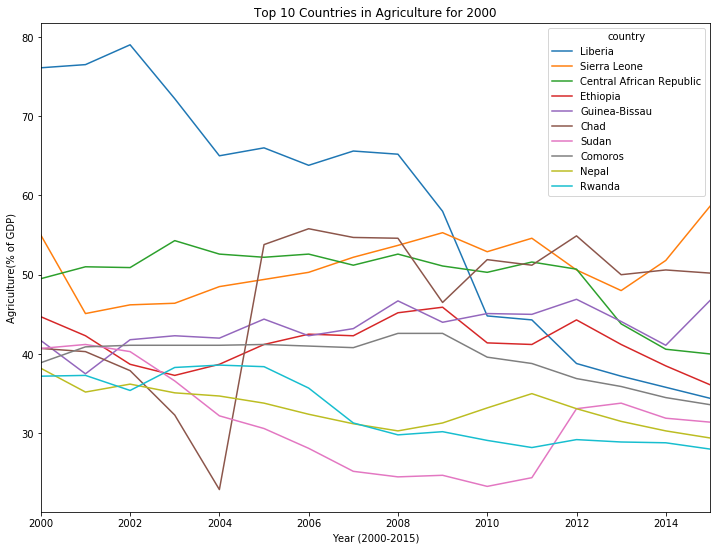

In [17]:
# Top 10 countries in Agriculture sector for year 2000

top10CountriesTimeSeries('Agriculture',2000)

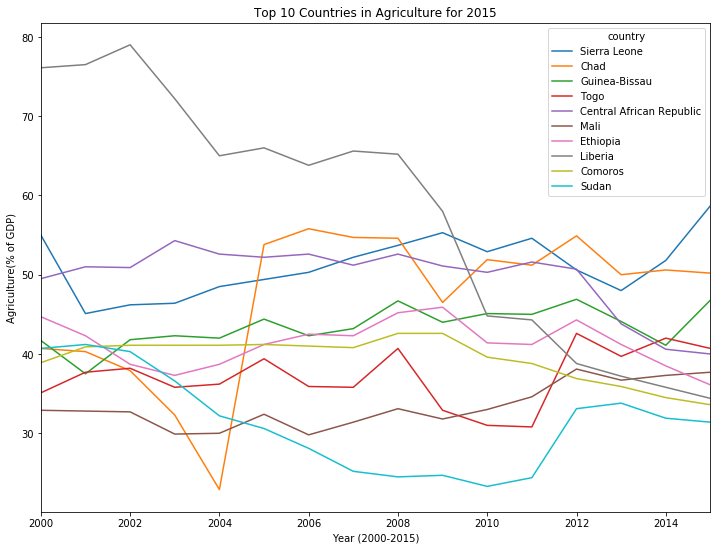

In [18]:
# Top 10 countries in Agriculture sector for year 2015

top10CountriesTimeSeries('Agriculture',2015)

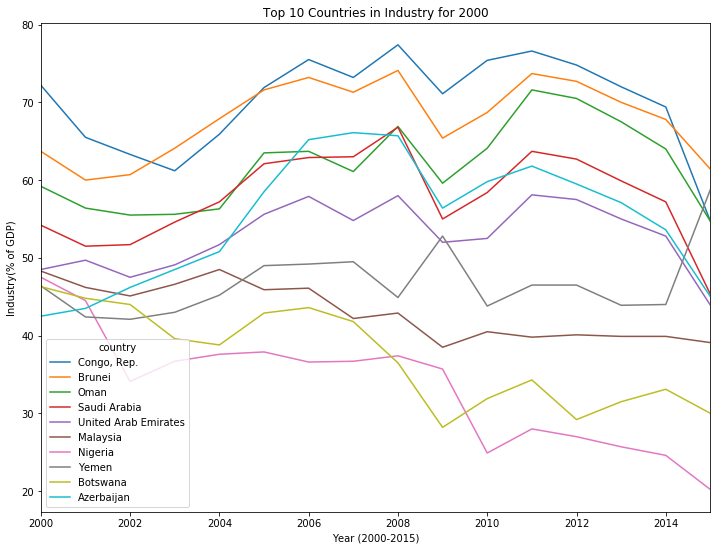

In [19]:
# Top 10 countries in Industry sector for year 2000

top10CountriesTimeSeries('Industry',2000)

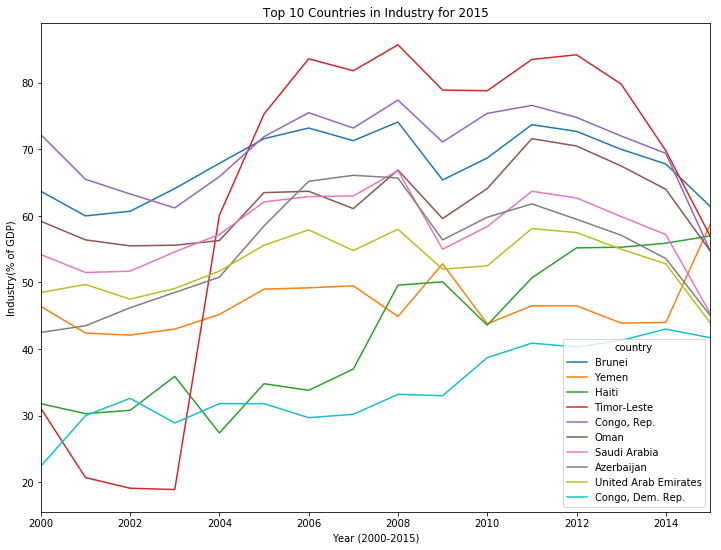

In [20]:
# Top 10 countries in Industry sector for year 2015

top10CountriesTimeSeries('Industry',2015)

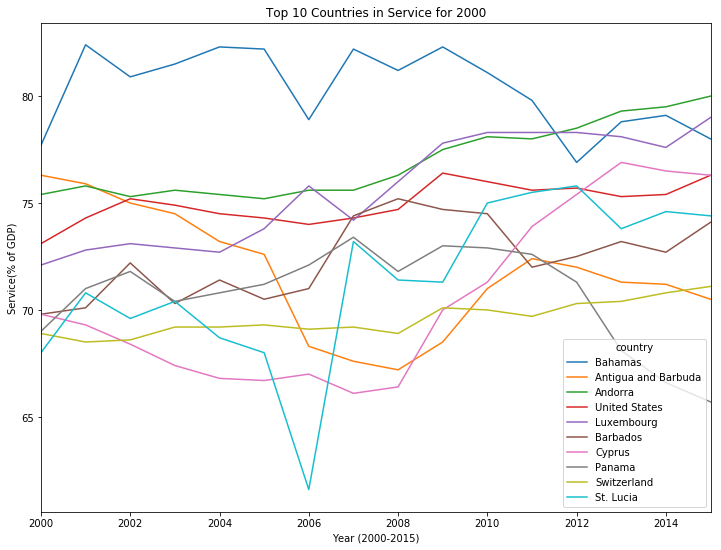

In [21]:
# Top 10 countries in Service sector for year 2000

top10CountriesTimeSeries('Service',2000)

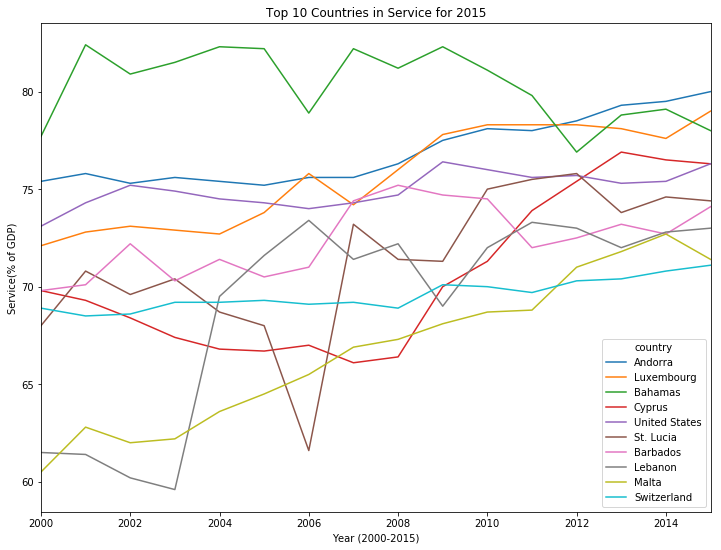

In [22]:
# Top 10 countries in Service sector for year 2015

top10CountriesTimeSeries('Service',2015)

In [23]:
# Function that maps a choropleth using plotly to show given country's economic dependence on certain sector for given year

def choroplethMapper(sectorName,year):
    
    newDf = pd.DataFrame(joinedDf[sectorName + ' (% of GDP)']).unstack().reset_index()
    data = [dict(type = 'choropleth',
                 colorscale = 'Plasma',
                 locations = newDf['country'],
                 locationmode = 'country names',                
                 z = newDf[sectorName + ' (% of GDP)'][year],
                 text = newDf['country'],
                 marker = dict(line=dict(color='rgb(255,255,255)', width=2)),
                 colorbar = dict(title=sectorName + ' (% of GDP)'))]
    
    layout = dict(title=sectorName + 'for ' + str(year)+
                  '<br />(Hover for Value)',
                  geo=dict(projection= dict(type='Mercator')  ))
    
    fig = dict(data=data, layout=layout)
    return py.iplot(fig, validate=False, filename='Sector_choropleth')

In [24]:
# Choropleth for Agriculture sector for 2000

choroplethMapper('Agriculture',2000)

In [25]:
# Choropleth for Agriculture sector for 2010

choroplethMapper('Agriculture',2010)

In [26]:
# Choropleth for Agriculture sector for 2015

choroplethMapper('Agriculture',2015)

In [27]:
# Choropleth for Industry sector for 2000

choroplethMapper('Industry',2000)

In [28]:
# Choropleth for Industry sector for 2010

choroplethMapper('Industry',2010)

In [29]:
# Choropleth for Industry sector for 2015

choroplethMapper('Industry',2015)

In [30]:
# Choropleth for Service sector for 2000

choroplethMapper('Service',2000)

In [31]:
# Choropleth for Service sector for 2010

choroplethMapper('Service',2010)

In [32]:
# Choropleth for Service sector for 2015

choroplethMapper('Service',2015)

In [33]:
# To look at the economic composition by region, first classify by region 
# Region Classification of The World Bank used (Geographical classification)

eastAsiaPacificRegion = list(['American Samoa','South Korea','Philippines','Australia','Lao','Samoa','Brunei', 
                              'Macao SAR','China','Singapore','Cambodia','Malaysia','Solomon Islands','Marshall Islands', 
                              'Taiwan', 'Fiji', 'Micronesia, Fed. Sts.', 'Thailand', 'French Polynesia','Mongolia','Timor-Leste', 
                              'Guam','Myanmar','Papua New Guinea','Hong Kong SAR','Nauru','Tonga','Indonesia','New Caledonia', 
                              'Tuvalu','Japan','New Zealand','Vanuatu','Kiribati','Northern Mariana Islands', 
                              'Vietnam', 'Korea, Dem. People Rep.','Palau'])

europeCentralAsiaRegion = list(['Albania','Gibraltar','Norway', 'Andorra','Greece','Poland','Armenia','Greenland',
                                'Portugal','Austria','Hungary','Romania','Azerbaijan','Iceland','Russia',
                                'Belarus','Ireland','San Marino','Belgium','Isle of Man','Serbia','Bosnia and Herzegovina',
                                'Italy','Slovak Republic','Bulgaria','Kazakhstan','Slovenia','Channel Islands','Kosovo',
                                'Spain','Croatia','Kyrgyz Republic','Sweden','Cyprus','Latvia','Switzerland','Czech Republic',
                                'Liechtenstein','Tajikistan','Denmark','Lithuania','Turkey','Estonia','Luxembourg','Turkmenistan',
                                'Faroe Islands','Macedonia, FYR','Ukraine','Finland','Moldova','United Kingdom','France',
                                'Monaco','Uzbekistan','Georgia','Montenegro','Germany','Netherlands'])

latinAmericaCaribbeanRegion = list(['Antigua and Barbuda','Curacao','Paraguay','Argentina','Dominica','Peru','Aruba', 
                                    'Dominican Republic','Puerto Rico','Bahamas','Ecuador','Sint Maarten (Dutch part)', 
                                    'Barbados', 'El Salvador','St. Kitts and Nevis','Belize','Grenada','St. Lucia',
                                    'Bolivia','Guatemala','St. Martin (French part)','Brazil','Guyana','St. Vincent and the Grenadines',
                                    'British Virgin Islands','Haiti','Suriname','Cayman Islands','Honduras','Trinidad and Tobago', 
                                    'Chile','Jamaica','Turks and Caicos Islands','Colombia','Mexico','Uruguay','Costa Rica', 
                                    'Nicaragua','Venezuela, RB','Cuba','Panama','Virgin Islands (U.S.)'])   

middleEastNorthAfricaRegion = list(['Algeria','Jordan','Qatar','Bahrain','Kuwait','Saudi Arabia','Djibouti','Lebanon', 
                                    'Syrian Arab Republic','Egypt, Arab Rep.','Libya','Tunisia','Iran',
                                    'Malta','United Arab Emirates','Iraq','Morocco','West Bank and Gaza','Israel','Oman', 
                                    'Yemen'])

northAmericaRegion = list(['Bermuda','Canada','United States'])

southAsiaRegion = list(['Afghanistan','India','Pakistan','Bangladesh','Maldives','Sri Lanka','Bhutan','Nepal'])

subSaharanAfricaRegion = list(['Angola','Gabon','Nigeria','Benin','Gambia','Rwanda','Botswana','Ghana','São Tomé and Principe', 
                               'Burkina Faso','Guinea','Senegal','Burundi','Guinea-Bissau','Seychelles','Cape Verde', 
                               'Kenya','Sierra Leone','Cameroon','Lesotho','Somalia','Central African Republic','Liberia', 
                               'South Africa','Chad','Madagascar','South Sudan','Comoros','Malawi','Sudan','Congo, Dem. Rep.', 
                               'Mali','Swaziland','Congo, Rep.','Mauritania','Tanzania',"Cote d'Ivoire",'Mauritius','Togo', 
                               'Equatorial Guinea','Mozambique','Uganda','Eritrea','Namibia','Zambia','Ethiopia','Niger', 
                               'Zimbabwe'])

In [34]:
joinedDf.head()

Population  GDP (in USD)  Agriculture (% of GDP)  \
country                                                          
Albania 2000     3120000  7.220000e+09                    23.5   
        2001     3120000  7.800000e+09                    21.9   
        2002     3120000  8.130000e+09                    21.6   
        2003     3110000  8.590000e+09                    21.5   
        2004     3100000  9.090000e+09                    20.2   

              Industry (% of GDP)  Service (% of GDP)  Other (% of GDP)  \
country                                                                   
Albania 2000                 14.8                50.4              11.3   
        2001                 16.4                51.4              10.3   
        2002                 17.5                50.1              10.8   
        2003                 20.5                46.3              11.7   
        2004                 21.6                46.2              12.0   

              GDP Per Capita (in USD)  Value by Agriculture (in USD)  \
country                                                                
Albania 2000              2314.102564                   1.696700e+09   
        2001              2500.000000                   1.708200e+09   
        2002              2605.769231                   1.756080e+09   
        2003              2762.057878                   1.846850e+09   
        2004              2932.258065                   1.836180e+09   

              Value by Industry (in USD)  Value by Service (in USD)  \
country                                                               
Albania 2000                1.068560e+09               3.638880e+09   
        2001                1.279200e+09               4.009200e+09   
        2002                1.422750e+09               4.073130e+09   
        2003                1.760950e+09               3.977170e+09   
        2004                1.963440e+09               4.199580e+09   

              Value by Other (in USD)  
country                                
Albania 2000             8.158600e+08  
        2001             8.034000e+08  
        2002             8.780400e+08  
        2003             1.005030e+09  
        2004             1.090800e+09

In [35]:
# Function to calculate the total values for a given column by classifying the countries into their regions first,
# and then calculating the total for each region for years 2000 to 2015
# Function returns a dataframe for the calculated total values for each region for each year

def totalByRegion (colName):
    dfeastAsiaPacificRegionExists = False
    dfeuropeCentralAsiaRegionExists = False
    dflatinAmericaCaribbeanRegionExists = False
    dfmiddleEastNorthAfricaRegionExists = False
    dfnorthAmericaRegionExists = False
    dfsouthAsiaRegionExists = False
    dfsubSaharanAfricaRegionExists = False


    for country in listOfCountries:
        if country in eastAsiaPacificRegion:
            if dfeastAsiaPacificRegionExists == False:
                dfeastAsiaPacificRegion = pd.DataFrame(joinedDf.loc[country][colName]).rename(columns={colName:country})
                dfeastAsiaPacificRegionExists = True
            else:
                dfeastAsiaPacificRegion = dfeastAsiaPacificRegion.join(pd.DataFrame(joinedDf.loc[country][colName]).rename(columns={colName:country}))
        elif country in europeCentralAsiaRegion:
            if dfeuropeCentralAsiaRegionExists == False:
                dfeuropeCentralAsiaRegion = pd.DataFrame(joinedDf.loc[country][colName]).rename(columns={colName:country})
                dfeuropeCentralAsiaRegionExists = True
            else:
                dfeuropeCentralAsiaRegion = dfeuropeCentralAsiaRegion.join(pd.DataFrame(joinedDf.loc[country][colName]).rename(columns={colName:country}))

        elif country in latinAmericaCaribbeanRegion:
            if dflatinAmericaCaribbeanRegionExists == False:
                dflatinAmericaCaribbeanRegion = pd.DataFrame(joinedDf.loc[country][colName]).rename(columns={colName:country})
                dflatinAmericaCaribbeanRegionExists = True
            else:
                dflatinAmericaCaribbeanRegion = dflatinAmericaCaribbeanRegion.join(pd.DataFrame(joinedDf.loc[country][colName]).rename(columns={colName:country}))

        elif country in middleEastNorthAfricaRegion:
            if dfmiddleEastNorthAfricaRegionExists == False:
                dfmiddleEastNorthAfricaRegion = pd.DataFrame(joinedDf.loc[country][colName]).rename(columns={colName:country})
                dfmiddleEastNorthAfricaRegionExists = True
            else:
                dfmiddleEastNorthAfricaRegion = dfmiddleEastNorthAfricaRegion.join(pd.DataFrame(joinedDf.loc[country][colName]).rename(columns={colName:country}))

        elif country in northAmericaRegion:
            if dfnorthAmericaRegionExists == False:
                dfnorthAmericaRegion = pd.DataFrame(joinedDf.loc[country][colName]).rename(columns={colName:country})
                dfnorthAmericaRegionExists = True
            else:
                dfnorthAmericaRegion = dfnorthAmericaRegion.join(pd.DataFrame(joinedDf.loc[country][colName]).rename(columns={colName:country}))   
        elif country in southAsiaRegion:
            if dfsouthAsiaRegionExists == False:
                dfsouthAsiaRegion = pd.DataFrame(joinedDf.loc[country][colName]).rename(columns={colName:country})
                dfsouthAsiaRegionExists = True
            else:
                dfsouthAsiaRegion = dfsouthAsiaRegion.join(pd.DataFrame(joinedDf.loc[country][colName]).rename(columns={colName:country}))

        elif country in subSaharanAfricaRegion:
            if dfsubSaharanAfricaRegionExists == False:
                dfsubSaharanAfricaRegion = pd.DataFrame(joinedDf.loc[country][colName]).rename(columns={colName:country})
                dfsubSaharanAfricaRegionExists = True
            else:
                dfsubSaharanAfricaRegion = dfsubSaharanAfricaRegion.join(pd.DataFrame(joinedDf.loc[country][colName]).rename(columns={colName:country}))
                
                
                
    dfeastAsiaPacificRegion = pd.DataFrame(dfeastAsiaPacificRegion.transpose().sum())
    dfeastAsiaPacificRegion.columns = ['East Asia and Pacific']

    dfeuropeCentralAsiaRegion = pd.DataFrame(dfeuropeCentralAsiaRegion.transpose().sum())
    dfeuropeCentralAsiaRegion.columns = ['Europe and Central Asia']

    dflatinAmericaCaribbeanRegion = pd.DataFrame(dflatinAmericaCaribbeanRegion.transpose().sum())
    dflatinAmericaCaribbeanRegion.columns = ['Latin America and Caribbean']

    dfmiddleEastNorthAfricaRegion = pd.DataFrame(dfmiddleEastNorthAfricaRegion.transpose().sum())
    dfmiddleEastNorthAfricaRegion.columns = ['Middle East and North Africa']

    dfnorthAmericaRegion = pd.DataFrame(dfnorthAmericaRegion.transpose().sum())
    dfnorthAmericaRegion.columns = ['North America']

    dfsouthAsiaRegion = pd.DataFrame(dfsouthAsiaRegion.transpose().sum())
    dfsouthAsiaRegion.columns = ['South Asia']

    dfsubSaharanAfricaRegion = pd.DataFrame(dfsubSaharanAfricaRegion.transpose().sum())
    dfsubSaharanAfricaRegion.columns = ['Sub Saharan Africa']

    outDf = pd.DataFrame(dfeastAsiaPacificRegion.join(dfeuropeCentralAsiaRegion).join(dflatinAmericaCaribbeanRegion).join(dfmiddleEastNorthAfricaRegion).join(dfnorthAmericaRegion).join(dfsouthAsiaRegion).join(dfsubSaharanAfricaRegion))
    return outDf

In [36]:
# Dataframes for total GDP and total output for each sectors based on regions

totalGDPByRegion = totalByRegion('GDP (in USD)')
totalAgriOutputByRegion = totalByRegion('Value by Agriculture (in USD)')
totalIndusOutputByRegion = totalByRegion('Value by Industry (in USD)')
totalServiceOutputByRegion = totalByRegion('Value by Service (in USD)')

In [37]:
# Function that plots pie chart for different sectors' contribution to the GDP for a given region and year

def pieChart(year, region):
    
    agriPercent = round(((totalAgriOutputByRegion.loc[year][region] / totalGDPByRegion.loc[year][region] ) * 100),3)
    indusPercent = round(((totalIndusOutputByRegion.loc[year][region] / totalGDPByRegion.loc[year][region] ) * 100),3)
    servPercent = round(((totalServiceOutputByRegion.loc[year][region] / totalGDPByRegion.loc[year][region] ) * 100),3)
    otherPercent = 100 - (agriPercent + indusPercent + servPercent)
    
    sizes = [agriPercent,indusPercent,servPercent,otherPercent]
    labels = ['Agriculture','Industry','Service','Other']
    
    plt.pie(sizes, autopct='%0.2f%%', startangle=180)
    plt.axis('equal')
    plt.legend(labels)
    plt.title(region)
    plt.show()

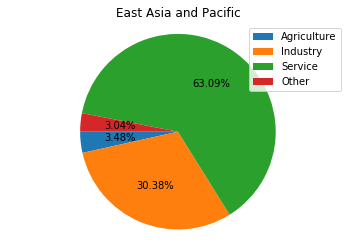

In [38]:
# Pie chart for East Asia and Pacific region for 2015

pieChart(2015,'East Asia and Pacific')

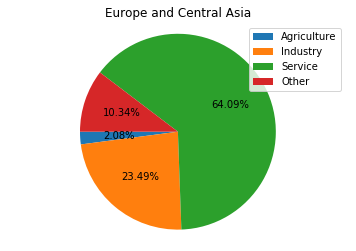

In [39]:
# Pie chart for Europe and Central Asia region for 2015

pieChart(2015,'Europe and Central Asia')

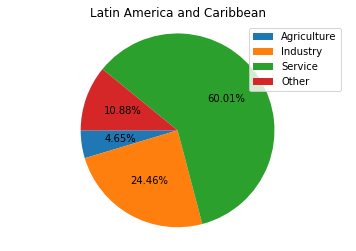

In [40]:
# Pie chart for Latin America and Caribbean region for 2015

pieChart(2015,'Latin America and Caribbean')

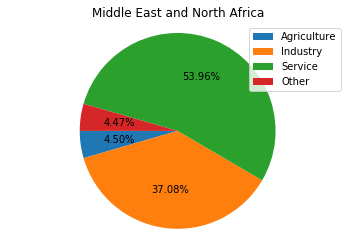

In [41]:
# Pie chart for Middle East and North Africa region for 2015

pieChart(2015,'Middle East and North Africa')

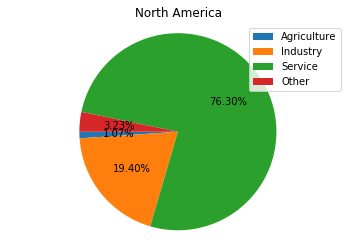

In [42]:
# Pie chart for North America region for 2015

pieChart(2015,'North America')

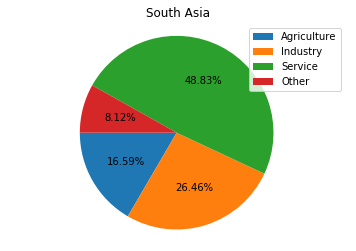

In [43]:
# Pie chart for South Asia region for 2015

pieChart(2015,'South Asia')

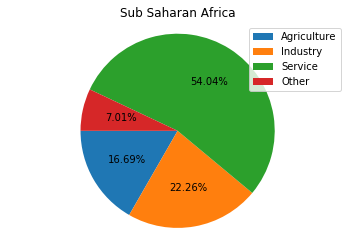

In [44]:
# Pie chart for Sub Saharan Africa region for 2015

pieChart(2015,'Sub Saharan Africa')

In [45]:
# Function that calculates a net percentage change in value for a certain attribute from given start year to give end year
# Function returns a dataframe with each country and its calculated values

def calcNetChange(colName,startYr=2000,endYr=2015):
    growthDict = dict()
    for country in listOfCountries:
        growth = ((joinedDf.loc[country].loc[endYr].loc[colName] - joinedDf.loc[country].loc[startYr].loc[colName])/(joinedDf.loc[country].loc[startYr].loc[colName])) * 100
        growthDict[country] = growth

    # making a list since dictionaries aren't indexed by numbers
    valuesList = list()
    for country in listOfCountries:
        valuesList.append(growthDict[country])

    newDf = pd.DataFrame(data={'country':listOfCountries[0:len(listOfCountries)],'Net % Change in ' + str(colName) :valuesList[0:len(valuesList)]})
    newDf = newDf.set_index(['country'])
    return newDf

In [46]:
# New dataframes for calculated net % change from 2000 to 2015 for different attributes and 
# joined the dataframes to form a new dataframe called newCombinedDf

newDfAgri = calcNetChange('Agriculture (% of GDP)')
newDfIndus = calcNetChange('Industry (% of GDP)')
newDfServ = calcNetChange('Service (% of GDP)')
newDfOther = calcNetChange('Other (% of GDP)')
newDfGDP = calcNetChange('GDP (in USD)')
newDfGDPPerCapita = calcNetChange('GDP Per Capita (in USD)')

newCombinedDf = newDfAgri.join(newDfIndus).join(newDfServ).join(newDfOther).join(newDfGDP).join(newDfGDPPerCapita)

C:\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: RuntimeWarning:

divide by zero encountered in double_scalars



In [47]:
# Rename columns 

newCombinedDf = newCombinedDf.rename(columns={'Net % Change in Agriculture (% of GDP)':'Net % change for Agriculture',
                              'Net % Change in Industry (% of GDP)':'Net % change for Industry',
                              'Net % Change in Service (% of GDP)':'Net % change for Service',
                              'Net % Change in Other (% of GDP)':'Net % change for Other',
                              'Net % Change in GDP (in USD)':'Net % change in GDP',
                              'Net % Change in GDP Per Capita (in USD)':'Net % change in GDP Per Capita'})

In [48]:
newCombinedDf.head()

,Net % change for Agriculture,Net % change for Industry,Net % change for Service,Net % change for Other,Net % change in GDP,Net % change in GDP Per Capita
country,,,,,,
Albania,-15.744681,47.297297,-8.134921,7.079646,80.055402,92.387963
Andorra,-3.490760,-30.638298,6.100796,-2.626585,22.097378,2.373956
Antigua and Barbuda,5.031447,16.666667,-7.601573,41.155235,28.000000,7.115115
Argentina,10.256410,-10.769231,-9.854604,113.477089,50.495050,28.648994
Armenia,-25.862069,-27.401130,57.003257,-16.822430,166.821346,180.527922


In [49]:
# function to plot a scatterplot

def plotScatterPlot(xVal, yVal):
    ax1 = newCombinedDf.plot.scatter(x=xVal,
                     y=yVal)   
    plt.show()

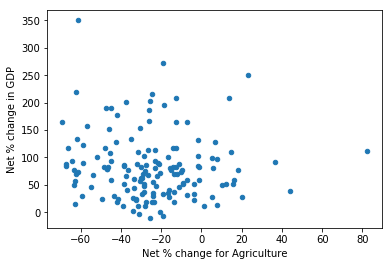

In [50]:
# Scatterplot (correlation plot) for Net % change in Agriculture and Net % change in GDP

plotScatterPlot('Net % change for Agriculture','Net % change in GDP')

In [51]:
# To find the correlation coefficient between net % change in Agriculture and net % change in GDP 

corrCoefAgriGDP = newCombinedDf['Net % change for Agriculture'].corr(newCombinedDf['Net % change in GDP'])
corrCoefAgriGDP

-0.078866854976940376

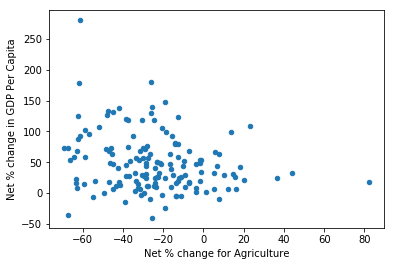

In [52]:
# Scatterplot (correlation plot) for Net % change in Agriculture and Net % change in GDP Per Capita
# since GDP per capita adjusts for population difference between countries

plotScatterPlot('Net % change for Agriculture','Net % change in GDP Per Capita')

In [53]:
# To find the correlation coefficient between net % change in Agriculture and net % change in GDP Per Capita

corrCoefAgriGDPPerCapita = newCombinedDf['Net % change for Agriculture'].corr(newCombinedDf['Net % change in GDP Per Capita'])
corrCoefAgriGDPPerCapita

-0.22831697349232524

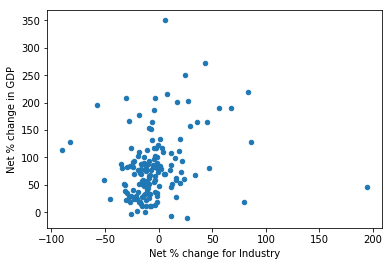

In [54]:
# Scatterplot (correlation plot) for Net change in Industry and Net change in GDP

plotScatterPlot('Net % change for Industry','Net % change in GDP')

In [55]:
# To find the correlation coefficient between net % change in Industry and net % change in GDP 

corrCoefIndusGDP = newCombinedDf['Net % change for Industry'].corr(newCombinedDf['Net % change in GDP'])
corrCoefIndusGDP

0.21029215853368854

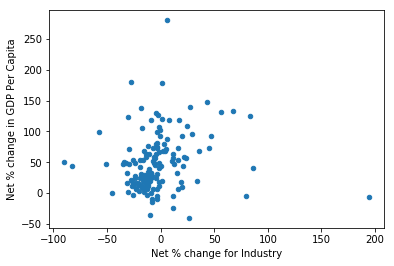

In [56]:
# Scatterplot (correlation plot) for Net % change in Industry and Net % change in GDP Per Capita
# since GDP per capita adjusts for population difference between countries

plotScatterPlot('Net % change for Industry','Net % change in GDP Per Capita')

In [57]:
# To find the correlation coefficient between net % change in Industry and net % change in GDP Per Capita

corrCoefIndusGDPPerCapita = newCombinedDf['Net % change for Industry'].corr(newCombinedDf['Net % change in GDP Per Capita'])
corrCoefIndusGDPPerCapita

0.1439233186246191

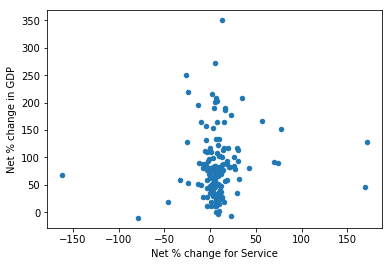

In [58]:
# Scatterplot (correlation plot) for Net % change in Service and Net % change in GDP

plotScatterPlot('Net % change for Service','Net % change in GDP')

In [59]:
# To find the correlation coefficient between net % change in Service and net % change in GDP 

corrCoefServGDP = newCombinedDf['Net % change for Service'].corr(newCombinedDf['Net % change in GDP'])
corrCoefServGDP

0.08386659850785555

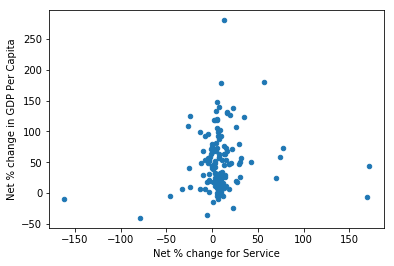

In [60]:
# Scatterplot (correlation plot) for Net % change in Service and Net % change in GDP Per Capita
# since GDP per capita adjusts for population difference between countries

plotScatterPlot('Net % change for Service','Net % change in GDP Per Capita')

In [61]:
# To find the correlation coefficient between net % change in Service and net % change in GDP Per Capita

corrCoefServGDPPerCapita = newCombinedDf['Net % change for Service'].corr(newCombinedDf['Net % change in GDP Per Capita'])
corrCoefServGDPPerCapita

0.11332731876696589